In [95]:
import obspy
import sys
sys.path.append('/home/ak287/seisbench/seisbench/models')
import seisbench.models as sbm
from obspy.clients.fdsn import Client
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from obspy.clients.fdsn.mass_downloader import Restrictions, MassDownloader, CircularDomain


client = Client('IRIS')

In [43]:
#model1 = sbm.QuakeXNetoneD.from_pretrained("base")
model2 = sbm.SeismicCNN.from_pretrained("base")

In [44]:
su_cat = pd.read_csv('../../data/event_catalogs_for_testing/surface_events_for_testing.csv')
su_cat.head(10)

,Date,Time,Lat,Lon,Depth,Mag,Magt,Nst,Gap,Clo,RMS,SRC,EventID,empty
0,2023/06/01,18:01:32.01,46.85080,-121.79300,-3.365,-5.0,Mh,0,0,0,0.00,UW,61929751,NaN
1,2023/06/01,18:39:58.07,46.87080,-121.73230,-2.877,-5.0,Mh,0,0,0,0.00,UW,61929771,NaN
2,2023/06/01,22:16:18.26,46.83560,-121.73300,-3.077,-5.0,Mh,0,0,0,0.00,UW,61929851,NaN
3,2023/06/03,05:11:55.95,46.83560,-121.73300,-3.077,-5.0,Mh,0,0,0,0.00,UW,61930241,NaN
4,2023/06/04,02:36:58.75,46.85080,-121.79300,-3.365,-5.0,Mh,0,0,0,0.00,UW,61930391,NaN
5,2023/06/05,06:37:01.29,45.35860,-121.70550,-2.590,-5.0,Mh,0,0,0,0.00,UW,61930566,NaN
6,2023/06/06,04:41:35.30,46.83560,-121.73300,-3.077,-5.0,Mh,0,0,0,0.00,UW,61930836,NaN
7,2023/06/06,09:12:18.56,48.75483,-121.83933,-0.500,1.1,ML,6,99,16,0.21,UW,61930856,NaN
8,2023/06/07,03:52:59.25,46.85080,-121.79300,-3.365,-5.0,Mh,0,0,0,0.00,UW,61931126,NaN
9,2023/06/07,05:24:16.48,46.83560,-121.73300,-3.077,-5.0,Mh,0,0,0,0.00,UW,61931136,NaN


In [48]:
# Combine Date and Time columns into a single datetime string
datetime_strs = su_cat['Date'] + ' ' + su_cat['Time']

# Convert each row to UTCDateTime
su_cat['UTCDateTime'] = datetime_strs.apply(obspy.UTCDateTime)


## Adding the station info to the catalog

In [74]:
# Add empty columns to store station info
su_cat['network'] = None
su_cat['station'] = None
su_cat['location'] = None
su_cat['channel_type'] = None

# Iterate through the DataFrame rows
for i, row in tqdm(su_cat.iterrows()):
    try:
        # Query station metadata near event location
        inv = client.get_stations(latitude=row['Lat'], 
                                  longitude=row['Lon'],
                                  starttime=row['UTCDateTime'] - 100,
                                  endtime=row['UTCDateTime'] + 100,  # add 1 second buffer
                                  maxradius=0.0001,
                                  level='response')
        
        # Assume first match is enough
        net = inv[0]
        sta = net[0]
        cha = sta[0]  # First channel (e.g., EHZ)

        su_cat.at[i, 'network'] = net.code
        su_cat.at[i, 'station'] = sta.code
        su_cat.at[i, 'location'] = cha.location_code
        su_cat.at[i, 'channel_type'] = cha.code[:2]  # 'EHZ' → 'EH'

    except Exception as e:
        print(f"Row {i} failed: {e}")
        continue


4it [00:00,  9.04it/s]

Row 2 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 3 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




8it [00:01,  8.03it/s]

Row 6 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 7 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




11it [00:02,  3.88it/s]

Row 9 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 10 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




12it [00:02,  4.62it/s]

Row 11 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




14it [00:03,  2.78it/s]

Row 13 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




17it [00:05,  2.42it/s]

Row 16 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




20it [00:07,  1.82it/s]

Row 19 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




22it [00:08,  1.70it/s]

Row 21 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




27it [00:14,  1.15it/s]

Row 26 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




29it [00:16,  1.19it/s]

Row 28 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




32it [00:17,  2.16it/s]

Row 30 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 31 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




37it [00:20,  2.59it/s]

Row 35 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 36 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




38it [00:20,  3.18it/s]

Row 37 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




41it [00:25,  1.12it/s]

Row 40 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




43it [00:25,  1.75it/s]

Row 42 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




48it [00:30,  1.44it/s]

Row 47 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




57it [00:45,  1.04it/s]

Row 55 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 56 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




65it [00:56,  1.42it/s]

Row 64 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




104it [01:53,  1.40s/it]

Row 103 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




106it [01:56,  1.29s/it]

Row 105 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




140it [02:49,  1.44s/it]

Row 139 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




144it [02:52,  1.54it/s]

Row 143 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




166it [03:14,  1.15it/s]

Row 164 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 165 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




181it [03:32,  1.33s/it]

Row 180 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




183it [03:33,  1.03it/s]

Row 182 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




191it [03:44,  1.19s/it]

Row 190 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




235it [04:58,  1.36s/it]

Row 234 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




255it [05:37,  1.74s/it]

Row 254 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




266it [05:53,  1.11s/it]

Row 265 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




282it [06:10,  1.14it/s]

Row 281 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




313it [07:19,  1.64s/it]

Row 312 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




319it [07:31,  1.69s/it]

Row 318 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




330it [07:50,  1.62s/it]

Row 330 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




336it [07:53,  1.43it/s]

Row 334 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 335 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




364it [08:21,  2.03it/s]

Row 363 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




368it [08:24,  1.61it/s]

Row 368 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




380it [08:39,  1.48s/it]

Row 380 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




382it [08:41,  1.27s/it]

Row 382 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




388it [08:47,  1.02s/it]

Row 388 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




393it [08:55,  1.59s/it]

Row 393 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




397it [08:58,  1.03it/s]

Row 397 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




399it [08:59,  1.26it/s]

Row 399 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




403it [09:06,  1.45s/it]

Row 403 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




408it [09:12,  1.32s/it]

Row 408 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




420it [09:27,  1.42s/it]

Row 420 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




422it [09:28,  1.01s/it]

Row 422 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




425it [09:31,  1.04s/it]

Row 425 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




437it [09:44,  1.06s/it]

Row 437 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




441it [09:46,  1.52it/s]

Row 439 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 440 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




448it [09:51,  1.81it/s]

Row 446 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 447 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




449it [09:51,  2.05it/s]

Row 448 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




452it [09:54,  1.30it/s]

Row 452 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




456it [09:55,  2.60it/s]

Row 454 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 455 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 456 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




460it [09:58,  1.43it/s]

Row 460 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




462it [09:59,  1.79it/s]

Row 462 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




464it [10:00,  1.65it/s]

Row 464 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




467it [10:02,  1.68it/s]

Row 467 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




475it [10:12,  1.18s/it]

Row 475 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




479it [10:16,  1.08s/it]

Row 479 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




481it [10:17,  1.16it/s]

Row 480 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 481 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




486it [10:19,  1.77it/s]

Row 484 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 485 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 486 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




492it [10:25,  1.32it/s]

Row 491 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




496it [10:28,  1.79it/s]

Row 494 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 495 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




497it [10:28,  2.35it/s]

Row 496 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




499it [10:29,  2.50it/s]

Row 498 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




502it [10:30,  2.97it/s]

Row 500 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 501 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




505it [10:32,  2.05it/s]

Row 504 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




506it [10:33,  1.48it/s]

Row 505 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




509it [10:36,  1.52it/s]

Row 507 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 508 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




512it [10:42,  1.21s/it]

Row 511 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




515it [10:43,  1.51it/s]

Row 513 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 514 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




518it [10:45,  2.12it/s]

Row 516 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 517 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




520it [10:45,  3.49it/s]

Row 518 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 519 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




523it [10:46,  2.67it/s]

Row 522 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




531it [10:54,  1.26it/s]

Row 529 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:


Row 530 failed: No data available for request.
HTTP Status code: 204
Detailed response of server:




532it [10:58,  1.24s/it]


## Finding all the unique seismic stations. 

To get an idea of what stations to consider and where to download the data from. 

In [91]:
# Filter out None before passing to np.unique
valid_stations = [s for s in su_cat['station'].values if s is not None]
unique_stations = np.unique(valid_stations)
print(unique_stations)

['B204' 'BRSP' 'CIHL' 'CLBH' 'CPCO' 'HIYU' 'HOA' 'HSR' 'LOO' 'LSON' 'MILD'
 'OBSR' 'PALM' 'PANH' 'RCS' 'REM' 'RER' 'SEP' 'SHUK' 'SHW' 'STAR' 'SUG'
 'TIMB' 'USFR' 'VALT' 'WIFE' 'YOCR']


In [88]:
# Rectangular domain containing parts of southern Germany.
domain = RectangularDomain(minlatitude=30, maxlatitude=50,
                           minlongitude=5, maxlongitude=35)

restrictions = Restrictions(
    # Get data for a whole year.
    starttime=obspy.UTCDateTime(2023, 6, 1),
    endtime=obspy.UTCDateTime(2023, 6, 3),
    # Chunk it to have one file per day.
    chunklength_in_sec=86400,
    # Considering the enormous amount of data associated with continuous
    # requests, you might want to limit the data based on SEED identifiers.
    # If the location code is specified, the location priority list is not
    # used; the same is true for the channel argument and priority list.
    network="BW", station="A*", location="", channel="EH*",
    # The typical use case for such a data set are noise correlations where
    # gaps are dealt with at a later stage.
    reject_channels_with_gaps=False,
    # Same is true with the minimum length. All data might be useful.
    minimum_length=0.0,
    # Guard against the same station having different names.
    minimum_interstation_distance_in_m=100.0)

# Restrict the number of providers if you know which serve the desired
# data. If in doubt just don't specify - then all providers will be
# queried.
mdl = MassDownloader(providers=["IRIS"])
mdl.download(domain, restrictions, mseed_storage="../test_data/waveforms",
             stationxml_storage="../test_data/stations")

1 Trace(s) in Stream:
UW.RCS..EHZ | 2023-06-01T00:00:00.000010Z - 2023-06-01T23:59:59.430010Z | 100.0 Hz, 8639944 samples

In [97]:
# List of specific stations
stations = [
    {"network": "UW", "station": "RCS", "channel": "EH?"},
    {"network": "UW", "station": "RER",  "channel": "HH?"},
    {"network": "UW", "station": "STAR",  "channel": "EH?"},
    {"network": "CC", "station": "PANH",  "channel": "BH?"}
]

start = obspy.UTCDateTime(2023, 6, 1)
end   = obspy.UTCDateTime(2023, 6, 3)

# Create downloader
mdl = MassDownloader(providers=["IRIS"])

for sta in stations:
    print(f"⏳ Downloading {sta['network']}.{sta['station']}...")

    restrictions = Restrictions(
        starttime=start,
        endtime=end,
        chunklength_in_sec=86400,
        network=sta["network"],
        station=sta["station"],
        location= "*",              # Use "" or "*" to avoid missing data
        channel= sta["channel"],             # 3-component high-gain short-period
        reject_channels_with_gaps=True,  # <-- IMPORTANT: reject days with gaps
        minimum_length=0.99,             # Only download if >=99% of the chunk is available
        sanitize=True
    )

    # Use a dummy domain since station is fixed
    domain = CircularDomain(latitude=0, longitude=0, minradius=0, maxradius=180)

    mdl.download(
        domain,
        restrictions,
        mseed_storage=f"waveforms/{sta['network']}.{sta['station']}",
        stationxml_storage=f"stations/{sta['network']}.{sta['station']}"
    )


[2025-06-09 09:42:48,111] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for IRIS.
[2025-06-09 09:42:48,111] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for IRIS.
[2025-06-09 09:42:48,111] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for IRIS.
[2025-06-09 09:42:48,116] - obspy.clients.fdsn.mass_downloader - INFO: Successfully initialized 1 client(s): IRIS.
[2025-06-09 09:42:48,116] - obspy.clients.fdsn.mass_downloader - INFO: Successfully initialized 1 client(s): IRIS.
[2025-06-09 09:42:48,116] - obspy.clients.fdsn.mass_downloader - INFO: Successfully initialized 1 client(s): IRIS.
[2025-06-09 09:42:48,117] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2025-06-09 09:42:48,117] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2025-06-09 09:42:48,117] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting s

⏳ Downloading UW.RCS...


[2025-06-09 09:42:50,866] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 1 channels (of 1)
[2025-06-09 09:42:50,866] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 1 channels (of 1)
[2025-06-09 09:42:50,866] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 1 channels (of 1)
[2025-06-09 09:42:51,015] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 1 channels (of 1)
[2025-06-09 09:42:51,015] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 1 channels (of 1)
[2025-06-09 09:42:51,015] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 1 channels (of 1)
[2025-06-09 09:42:51,017] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Launching basic QC checks...
[2025-06-09 09:42:51,017] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Launching basic QC chec

⏳ Downloading UW.RER...


[2025-06-09 09:42:55,579] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 1 channels (of 1)
[2025-06-09 09:42:55,579] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 1 channels (of 1)
[2025-06-09 09:42:55,579] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 1 channels (of 1)
[2025-06-09 09:42:55,905] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 1 channels (of 1)
[2025-06-09 09:42:55,905] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 1 channels (of 1)
[2025-06-09 09:42:55,905] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 1 channels (of 1)
[2025-06-09 09:42:55,911] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 1 channels (of 1)
[2025-06-09 09:42:55,911] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successful

[2025-06-09 09:43:00,489] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Will attempt to download data from 1 stations.
[2025-06-09 09:43:00,489] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Will attempt to download data from 1 stations.
[2025-06-09 09:43:00,490] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Status for 6 time intervals/channels before downloading: NEEDS_DOWNLOADING
[2025-06-09 09:43:00,490] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Status for 6 time intervals/channels before downloading: NEEDS_DOWNLOADING
[2025-06-09 09:43:00,490] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Status for 6 time intervals/channels before downloading: NEEDS_DOWNLOADING


⏳ Downloading UW.STAR...


[2025-06-09 09:43:05,697] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 1 channels (of 1)
[2025-06-09 09:43:05,697] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 1 channels (of 1)
[2025-06-09 09:43:05,697] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 1 channels (of 1)
[2025-06-09 09:43:05,798] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 1 channels (of 1)
[2025-06-09 09:43:05,798] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 1 channels (of 1)
[2025-06-09 09:43:05,798] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 1 channels (of 1)
[2025-06-09 09:43:05,862] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 1 channels (of 1)
[2025-06-09 09:43:05,862] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successful

[2025-06-09 09:43:10,559] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - No data could be downloaded.
[2025-06-09 09:43:10,560] - obspy.clients.fdsn.mass_downloader - INFO: ============================== Final report
[2025-06-09 09:43:10,560] - obspy.clients.fdsn.mass_downloader - INFO: ============================== Final report
[2025-06-09 09:43:10,560] - obspy.clients.fdsn.mass_downloader - INFO: ============================== Final report
[2025-06-09 09:43:10,561] - obspy.clients.fdsn.mass_downloader - INFO: 0 MiniSEED files [0.0 MB] already existed.
[2025-06-09 09:43:10,561] - obspy.clients.fdsn.mass_downloader - INFO: 0 MiniSEED files [0.0 MB] already existed.
[2025-06-09 09:43:10,561] - obspy.clients.fdsn.mass_downloader - INFO: 0 MiniSEED files [0.0 MB] already existed.
[2025-06-09 09:43:10,561] - obspy.clients.fdsn.mass_downloader - INFO: 0 StationXML files [0.0 MB] already existed.
[2025-06-09 09:43:10,561] - obspy.clients.fdsn.mass_downloader - INFO: 0 StationX

⏳ Downloading CC.PANH...


[2025-06-09 09:43:15,511] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 3 channels (of 3)
[2025-06-09 09:43:15,511] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 3 channels (of 3)
[2025-06-09 09:43:15,511] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 3 channels (of 3)
[2025-06-09 09:43:15,622] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 3 channels (of 3)
[2025-06-09 09:43:15,622] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 3 channels (of 3)
[2025-06-09 09:43:15,622] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully downloaded 3 channels (of 3)
[2025-06-09 09:43:15,625] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Launching basic QC checks...
[2025-06-09 09:43:15,625] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Launching basic QC chec

In [40]:
probs_a

array([[1.7990221e-01, 5.3443841e-06, 8.2007354e-01, 1.8885934e-05],
       [2.8291645e-03, 1.9629143e-01, 2.0810401e-02, 7.8006905e-01],
       [6.5263092e-05, 3.1172261e-02, 1.4649706e-01, 8.2226545e-01]],
      dtype=float32)

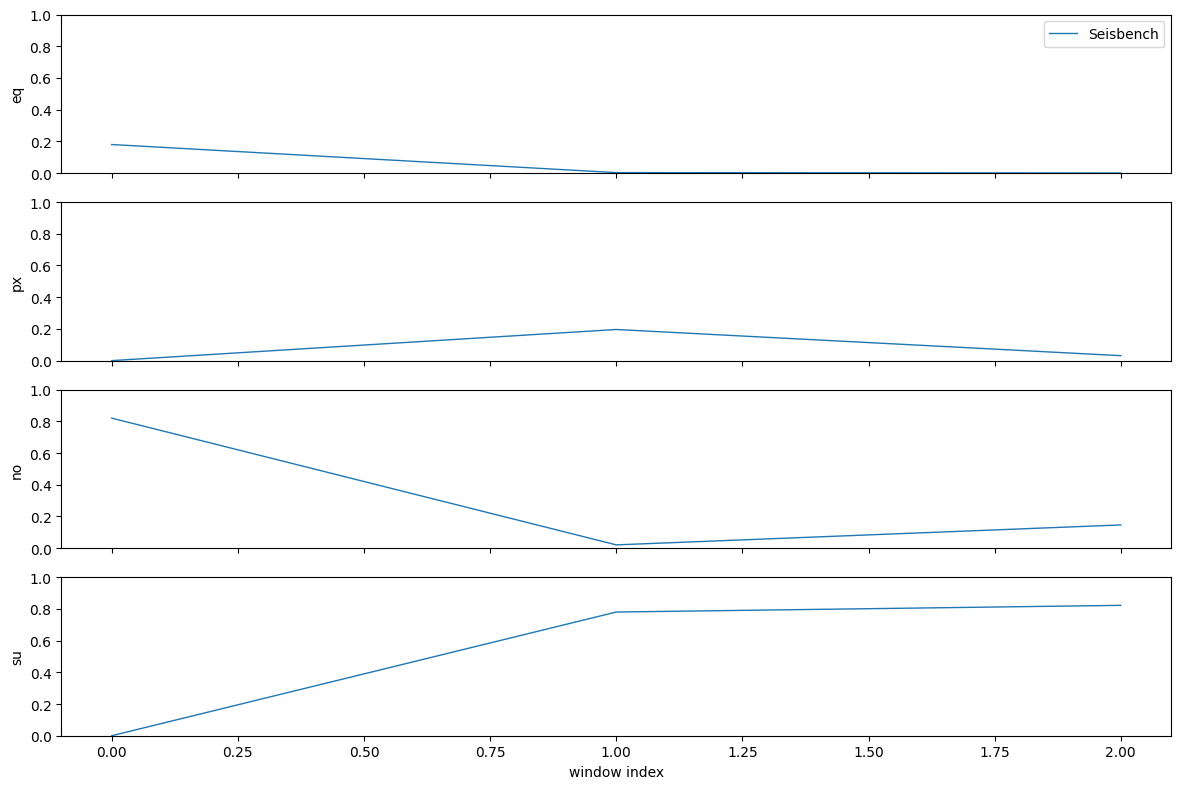

In [41]:
time = np.arange(len(probs_a))    # one tick per window
fig, ax = plt.subplots(4, 1, sharex=True, figsize=(12, 8))

class_names = ["eq", "px", "no", "su"]
for k in range(4):
    ax[k].plot(time, probs_a[:, k], label="Seisbench", lw=1)
    ax[k].set_ylabel(class_names[k])
    ax[k].set_ylim(0, 1)
ax[-1].set_xlabel("window index")
ax[0].legend(loc="upper right")
plt.tight_layout()
plt.show()
